In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import shap


nmp = np.load('/Users/saranabili/Desktop/jobHunts/thermo_stability/files/npz_datasplits.npz')
X_train, y_train, X_test, y_test = nmp['X_train'],nmp['y_train'], nmp['X_test'], nmp['y_test']

npd = pd.read_csv('/Users/saranabili/Desktop/jobHunts/thermo_stability/files/df_datasplit.csv')
Xpd_train_scaled = npd[npd['split'] == 'train_scaled'].drop(columns=['split','label'])
ypd_train = npd[npd['split'] == 'train_label']['label']
Xpd_test_scaled = npd[npd['split'] == 'test_scaled'].drop(columns=['split','label'])
ypd_test = npd[npd['split'] == 'test_label']['label']

feature_list = list(Xpd_train_scaled.columns[:9]) + list(Xpd_train_scaled.columns[-4:])
model = xgb.XGBClassifier()
model.fit(Xpd_train_scaled, ypd_train)
#import joblib
#xgbmodel = joblib.load('/Users/saranabili/Desktop/jobHunts/thermo_stability/files/models/MLHypertune_pars/XGB_model.joblib')

Xpd_test_subset = Xpd_test_scaled

result = permutation_importance(model, Xpd_test_scaled, ypd_test, scoring='roc_auc', n_repeats=20,random_state=42)
#result = permutation_importance(xgbmodel, Xpd_test_scaled, ypd_test, scoring='roc_auc', n_repeats=20,random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

# Store all importances
all_features = Xpd_test_scaled.columns
importance_df = pd.DataFrame({
    'feature': all_features,
    'mean_importance': result.importances_mean,
    'std_importance': result.importances_std
})
# Define your subset
feature_subset = list(Xpd_test_scaled.columns[:9]) + list(Xpd_test_scaled.columns[-4:])

# Filter the importance DataFrame
subset_df = importance_df[importance_df['feature'].isin(feature_subset)]
subset_df = subset_df.sort_values(by='mean_importance', ascending=True)


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(subset_df['feature'], subset_df['mean_importance'],xerr=subset_df['std_importance'])
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)
plt.xlabel("Decrease in ROC AUC",fontsize=18)
plt.title("Permutation Importance (Selected Features)")
#plt.axvline(x=0.01)
plt.tight_layout()
plt.savefig('/Users/saranabili/Desktop/jobHunts/thermo_stability/files/plots/xgb_permutationimportance.pdf')

'''plt.barh(range(len(perm_sorted_idx)), result.importances_mean[perm_sorted_idx])
plt.yticks(range(len(perm_sorted_idx)), [Xpd_test_subset.columns[i] for i in perm_sorted_idx])
plt.xlabel("Decrease in ROC AUC")
plt.title("Permutation Importance")
plt.show()'''

'''#explainer = shap.Explainer(xgbmodel, Xpd_train_scaled[feature_list])
explainer = shap.Explainer(model, Xpd_train_scaled[feature_list])
shap_values = explainer(Xpd_test_scaled[feature_list])

# Summary plot: global feature importance
shap.plots.beeswarm(shap_values)'''

/opt/anaconda3/envs/env_ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

DNN

In [4]:
from sklearn.inspection import permutation_importance
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import shap

npd = pd.read_csv('/Users/saranabili/Desktop/jobHunts/thermo_stability/files/df_datasplit.csv')

Xpd_train_scaled = npd[npd['split'] == 'train_scaled'].drop(columns=['split','label'])
Xpd_test_scaled = npd[npd['split'] == 'test_scaled'].drop(columns=['split','label'])
Xpd_val_scaled = npd[npd['split'] == 'val_scaled'].drop(columns=['split','label'])
ypd_train = npd[npd['split'] == 'train_label']['label']
ypd_val = npd[npd['split'] == 'val_label']['label']
ypd_test = npd[npd['split'] == 'test_label']['label']


# Define your model
def build_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(Xpd_train_scaled.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))  # Binary output
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap and train
model = KerasClassifier(build_fn=build_model, epochs=13, batch_size=128)
model.fit(Xpd_train_scaled, ypd_train)

# Evaluate permutation importance
result = permutation_importance(model, Xpd_val_scaled, ypd_val, scoring='accuracy', n_repeats=10,random_state=42)

import pandas as pd

# Store all importances
all_features = Xpd_test_scaled.columns
importance_df = pd.DataFrame({
    'feature': all_features,
    'mean_importance': result.importances_mean,
    'std_importance': result.importances_std
})
# Define your subset
feature_subset = list(Xpd_test_scaled.columns[:9]) + list(Xpd_test_scaled.columns[-4:])

# Filter the importance DataFrame
subset_df = importance_df[importance_df['feature'].isin(feature_subset)]
subset_df = subset_df.sort_values(by='mean_importance', ascending=True)


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(subset_df['feature'], subset_df['mean_importance'],xerr=subset_df['std_importance'])
plt.xlabel("Decrease in ROC AUC")
plt.title("Permutation Importance (Selected Features)")
plt.tight_layout()
plt.show()


/opt/anaconda3/envs/env_ml/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2025-07-28 17:41:59.916257: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-07-28 17:41:59.916550: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-07-28 17:41:59.916576: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-07-28 17:41:59.917381: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-28 17:41:59.918024: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical

Epoch 1/13


2025-07-28 17:42:00.881494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


335/335 [==============================] - 3s 6ms/step - loss: 0.5207 - accuracy: 0.7462
Epoch 2/13
335/335 [==============================] - 2s 5ms/step - loss: 0.4969 - accuracy: 0.7630
Epoch 3/13
335/335 [==============================] - 2s 5ms/step - loss: 0.4938 - accuracy: 0.7643
Epoch 4/13
335/335 [==============================] - 2s 6ms/step - loss: 0.4919 - accuracy: 0.7675
Epoch 5/13
335/335 [==============================] - 2s 5ms/step - loss: 0.4917 - accuracy: 0.7652
Epoch 6/13
335/335 [==============================] - 2s 5ms/step - loss: 0.4908 - accuracy: 0.7657
Epoch 7/13
335/335 [==============================] - 2s 5ms/step - loss: 0.4916 - accuracy: 0.7653
Epoch 8/13
335/335 [==============================] - 2s 5ms/step - loss: 0.4902 - accuracy: 0.7668
Epoch 9/13
335/335 [==============================] - 2s 5ms/step - loss: 0.4912 - accuracy: 0.7658
Epoch 10/13
335/335 [==============================] - 2s 5ms/step - loss: 0.4910 - accuracy: 0.7647
Epoch 11/1

KeyboardInterrupt: 

Epoch 1/13


/opt/anaconda3/envs/env_ml/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


335/335 [==============================] - 3s 7ms/step - loss: 0.5215 - roc_auc: 0.8126
Epoch 2/13
335/335 [==============================] - 2s 7ms/step - loss: 0.4955 - roc_auc: 0.8317
Epoch 3/13
335/335 [==============================] - 2s 7ms/step - loss: 0.4939 - roc_auc: 0.8332
Epoch 4/13
335/335 [==============================] - 2s 7ms/step - loss: 0.4923 - roc_auc: 0.8348
Epoch 5/13
335/335 [==============================] - 2s 7ms/step - loss: 0.4916 - roc_auc: 0.8350
Epoch 6/13
335/335 [==============================] - 2s 7ms/step - loss: 0.4904 - roc_auc: 0.8362
Epoch 7/13
335/335 [==============================] - 2s 7ms/step - loss: 0.4911 - roc_auc: 0.8360
Epoch 8/13
335/335 [==============================] - 2s 7ms/step - loss: 0.4911 - roc_auc: 0.8356
Epoch 9/13
335/335 [==============================] - 2s 7ms/step - loss: 0.4899 - roc_auc: 0.8369
Epoch 10/13
335/335 [==============================] - 2s 7ms/step - loss: 0.4914 - roc_auc: 0.8359
Epoch 11/13
335/335 

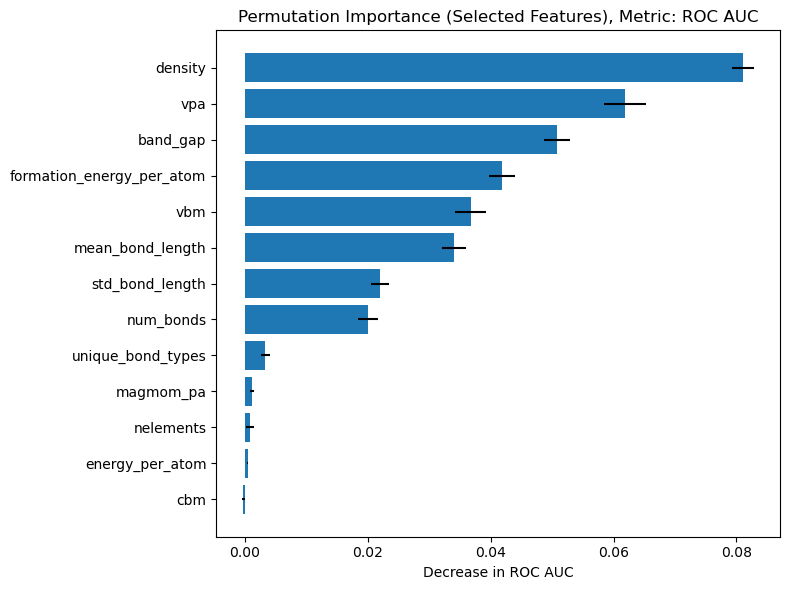

In [6]:
from tensorflow.keras import metrics
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import shap

npd = pd.read_csv('/Users/saranabili/Desktop/jobHunts/thermo_stability/files/df_datasplit.csv')

Xpd_train_scaled = npd[npd['split'] == 'train_scaled'].drop(columns=['split','label'])
Xpd_test_scaled = npd[npd['split'] == 'test_scaled'].drop(columns=['split','label'])
Xpd_val_scaled = npd[npd['split'] == 'val_scaled'].drop(columns=['split','label'])
ypd_train = npd[npd['split'] == 'train_label']['label']
ypd_val = npd[npd['split'] == 'val_label']['label']
ypd_test = npd[npd['split'] == 'test_label']['label']

# Define your model
def build_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(Xpd_train_scaled.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))  # Binary output
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[metrics.AUC(name='roc_auc')])
    return model

# Wrap and train
dnn_model = KerasClassifier(build_fn=build_model, epochs=13, batch_size=128)
dnn_model.fit(Xpd_train_scaled, ypd_train)

# Evaluate permutation importance
result = permutation_importance(dnn_model, Xpd_val_scaled, ypd_val, scoring='roc_auc', n_repeats=10,random_state=42)

sorted_idx = result.importances_mean.argsort()

import pandas as pd

# Store all importances
all_features = Xpd_test_scaled.columns
importance_df = pd.DataFrame({
    'feature': all_features,
    'mean_importance': result.importances_mean,
    'std_importance': result.importances_std
})
# Define your subset
feature_subset = list(Xpd_test_scaled.columns[:9]) + list(Xpd_test_scaled.columns[-4:])

# Filter the importance DataFrame
subset_df = importance_df[importance_df['feature'].isin(feature_subset)]
subset_df = subset_df.sort_values(by='mean_importance', ascending=True)


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(subset_df['feature'], subset_df['mean_importance'],xerr=subset_df['std_importance'])
plt.xlabel("Decrease in ROC AUC")
plt.title("Permutation Importance (Selected Features), Metric: ROC AUC")
plt.tight_layout()
plt.show()


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

# Ensure reproducibility
np.random.seed(42)

nmp = np.load('/Users/saranabili/Desktop/jobHunts/thermo_stability/files/npz_datasplits.npz')
X_train_scaled, y_train, X_test_scaled, y_test = nmp['X_train_scaled'],nmp['y_train'], nmp['X_test_scaled'], nmp['y_test']



# 🔹 Your scaled data
# X_train_scaled, X_test_scaled, y_train, y_test already exist as pandas DataFrames

# ✅ Build the DNN Model
def build_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')  # Use 'softmax' if it's multiclass
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 🧠 Train the model
model = build_model()
model.fit(X_train_scaled, y_train, batch_size=128, epochs=13, verbose=1)

# 🔍 SHAP explanation (using DeepExplainer for TensorFlow/Keras)
explainer = shap.DeepExplainer(model, X_train_scaled[:100])
shap_values = explainer.shap_values(X_test_scaled[:100])

# 🧮 SHAP summary bar plot
shap.summary_plot(shap_values[0], X_test_scaled[:100], plot_type='bar')

# 🌀 SHAP beeswarm plot (shows distributions per feature)
shap.summary_plot(shap_values[0], X_test_scaled[:100])


/var/folders/xv/4zc8hcjd6hxgndqc76rpw12r0000gn/T/ipykernel_31459/403165804.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_2d[:, top_indices], X_test_scaled[:100, top_indices],feature_names=feat_imporname)#,label=Xpd_train_scaled.columns[top_indices])


/var/folders/xv/4zc8hcjd6hxgndqc76rpw12r0000gn/T/ipykernel_31459/403165804.py:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_2d[:, top_indices], X_test_scaled[:100, top_indices], plot_type='bar',feature_names=feat_imporname)


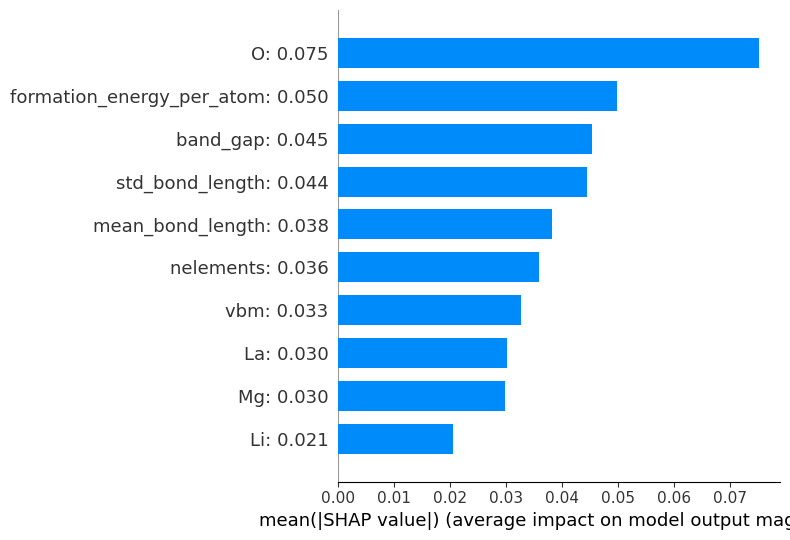

<Figure size 640x480 with 0 Axes>

In [88]:
shap_values_2d = np.squeeze(shap_values)
mean_shap = np.abs(shap_values_2d).mean(axis=0)
top_indices = np.argsort(mean_shap)[-10:]  # top 10 features
feat_imporname = [Xpd_train_scaled.columns[i] for i in top_indices]
shap.summary_plot(shap_values_2d[:, top_indices], X_test_scaled[:100, top_indices],feature_names=feat_imporname)#,label=Xpd_train_scaled.columns[top_indices])

feat_imporname = [f"{Xpd_train_scaled.columns[i]}: {mean_shap[i]:.3f}" for i in top_indices]

sorted_values = mean_shap[top_indices]
shap.summary_plot(shap_values_2d[:, top_indices], X_test_scaled[:100, top_indices], plot_type='bar',feature_names=feat_imporname)
plt.tight_layout()


In [67]:
[(Xpd_train_scaled.columns[i], mean_shap[i]) for i in top_indices]
#[Xpd_train_scaled.columns[i] for i in top_indices]

[('Li', 0.02056410436136102),
 ('Mg', 0.029686595968615278),
 ('La', 0.030111713831749234),
 ('vbm', 0.03259300981190262),
 ('nelements', 0.03591785323529835),
 ('mean_bond_length', 0.03822636134685123),
 ('std_bond_length', 0.04445769842692911),
 ('band_gap', 0.0453944930980792),
 ('formation_energy_per_atom', 0.049822260127953336),
 ('O', 0.07512884691012013)]

In [89]:
Xpd_train_scaled.shape

(42836, 97)

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import shap


nmp = np.load('/Users/saranabili/Desktop/jobHunts/thermo_stability/files/npz_datasplits.npz')
X_train, y_train, X_test, y_test = nmp['X_train'],nmp['y_train'], nmp['X_test'], nmp['y_test']

npd = pd.read_csv('/Users/saranabili/Desktop/jobHunts/thermo_stability/files/df_datasplit.csv')
Xpd_train_scaled = npd[npd['split'] == 'train_scaled'].drop(columns=['split','label'])
ypd_train = npd[npd['split'] == 'train_label']['label']
Xpd_test_scaled = npd[npd['split'] == 'test_scaled'].drop(columns=['split','label'])
ypd_test = npd[npd['split'] == 'test_label']['label']

In [ ]:
Xpd_train = npd[npd['split'] == 'train'].drop(columns=['split','label'])
max(Xpd_train['mean_bond_length']), 

4.888442119005352